In [1]:
import numpy as np
import matplotlib.pyplot as plt

k = 2

# x, y, r
balls = set[tuple[int, int, int]]([(1, 3, 2), (5, 3, 3), (8, 3, 5)])

# points
num_points = 10
minlim = 0
maxlim = 10
coords_x = np.random.randint(minlim, maxlim, num_points)
coords_y = np.random.randint(minlim, maxlim, num_points)
points = list(zip(coords_x, coords_y))

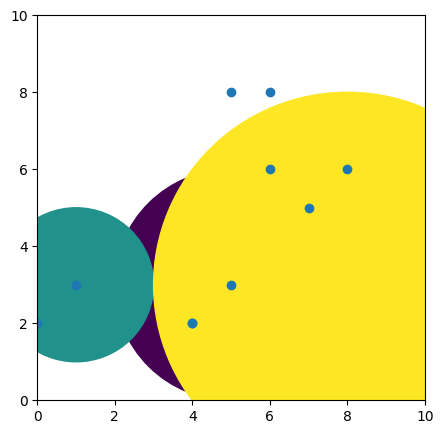

In [2]:
def plot(balls):
    colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(balls)))
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.xlim(minlim, maxlim)
    plt.ylim(minlim, maxlim)

    for i, (x, y, r) in enumerate(balls):
        circle = plt.Circle((x, y), r, color=colors[i])
        ax.add_patch(circle)
    ax.scatter(coords_x, coords_y)

plot(balls)

In [3]:
import math

def in_circle(center_x, center_y, radius, x, y):
    dist = math.sqrt((center_x - x) ** 2 + (center_y - y) ** 2)
    return dist <= radius

for i, (x_center, y_center, r) in enumerate(balls):
    for (x, y) in points:
        if in_circle(x_center, y_center, r, x, y):
            # print(f'{(x, y)} in ball {i}: {(x_center, y_center, r)}')
            print(f'{(int(x), int(y))} in ball {i}: {(int(x_center), int(y_center), int(r))}')

(5, 3) in ball 0: (5, 3, 3)
(4, 2) in ball 0: (5, 3, 3)
(4, 2) in ball 0: (5, 3, 3)
(7, 5) in ball 0: (5, 3, 3)
(0, 2) in ball 1: (1, 3, 2)
(1, 3) in ball 1: (1, 3, 2)
(5, 3) in ball 2: (8, 3, 5)
(6, 6) in ball 2: (8, 3, 5)
(4, 2) in ball 2: (8, 3, 5)
(8, 6) in ball 2: (8, 3, 5)
(4, 2) in ball 2: (8, 3, 5)
(7, 5) in ball 2: (8, 3, 5)


In [ ]:
O_balls = set[tuple[int, int, int]]()
O_points = set[tuple[int, int]]()

# O substet of V
def find_initial_max_covering_ball(O_balls, balls, O_points, points):
    max_ball = None
    selected_points = set[tuple[int, int]]()

    for current_ball in balls:
        (x_center, y_center, r) = current_ball
        current_point_coverage = set[tuple[int, int]]()

        for (x, y) in points:
            if in_circle(x_center, y_center, r, x, y) and (x, y) not in O_points:
                current_point_coverage.add((x, y))
        
        if len(current_point_coverage)>= len(selected_points):
            max_ball = current_ball
            selected_points = current_point_coverage
    
    return max_ball, selected_points

for i in range(k):
    max_ball, selected_points = find_initial_max_covering_ball(O_balls, balls, O_points, points)
    
    # remove from V
    balls.remove(max_ball)
    for point in selected_points:
        points.remove(point)

    # add to S
    O_balls.add(max_ball)
    O_points = O_points.union(selected_points)


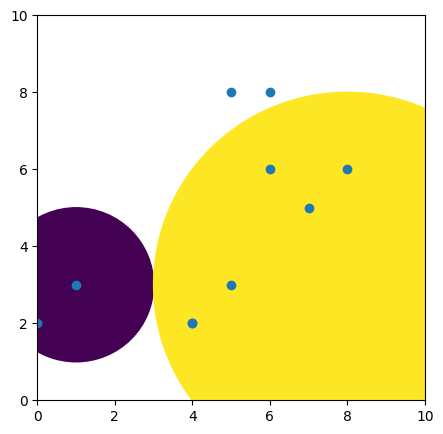

In [5]:
plot(O_balls)